/tmp/ipykernel_2758456/213912370.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Conditions"] = data["JointSnow"].map({0: "No Snow", 1: "Ground Snow", 2: "Ground and Canopy Snow"})


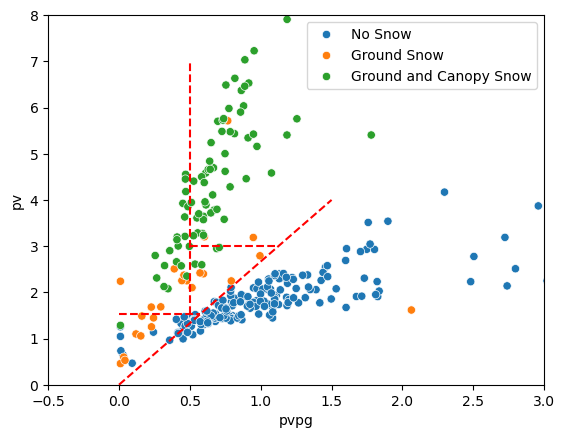

294


,camera,date,lat,lon,pvpg,pv,pg,data_quantity,snr,FSC,TreeSnow,layer_flag,file_index,msw_flag,pv_ratio_mean,pv_ratio_max,JointSnow,Conditions
0,delta_junction,01/08/2021,63.849568,-145.741168,0.924094,1.740098,1.883032,33.000000,0.288152,0.0,0.0,0.0,18.0,0.000000,NaN,NaN,0.0,No Snow
2,delta_junction,01/08/2021,63.858577,-145.741168,0.595489,1.404310,2.358249,30.000000,0.288152,0.0,0.0,0.0,18.0,0.000000,NaN,NaN,0.0,No Snow
4,delta_junction,01/08/2021,63.876595,-145.741168,0.243051,1.138873,4.685735,31.000000,0.283702,0.0,0.0,0.0,18.0,0.000000,NaN,NaN,0.0,No Snow
6,delta_junction,01/08/2021,63.885605,-145.741168,0.451737,1.245196,2.756459,42.000000,0.280986,0.0,0.0,0.0,18.0,0.000000,NaN,NaN,0.0,No Snow
8,delta_junction,01/08/2021,63.894614,-145.741168,0.437683,1.326541,3.030829,28.000000,0.280986,0.0,0.0,0.0,18.0,0.000000,NaN,NaN,0.0,No Snow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1285,torgnon,21/05/2020,45.828305,7.515652,2.797484,2.510851,0.897539,25.782609,0.086268,0.0,0.0,0.0,8.0,1.347826,1.630907,1.630907,0.0,No Snow
1297,torgnon,22/02/2022,45.828305,7.528580,9.625301,2.651121,0.275433,25.000000,0.280443,1.0,0.0,0.0,18.0,0.000000,NaN,NaN,1.0,Ground Snow
1299,torgnon,23/08/2022,45.819295,7.554436,2.481689,2.230456,0.898765,21.975610,0.186102,0.0,0.0,0.0,21.0,0.000000,1.579313,1.579313,0.0,No Snow
1300,torgnon,23/08/2022,45.828305,7.554436,1.730994,2.306458,1.332447,22.612903,0.214997,0.0,0.0,0.0,21.0,0.000000,1.602506,1.602506,0.0,No Snow


In [63]:
from scripts.imports import *

df = pd.read_pickle('dataset_landcover_forest_22_th3_1km_noprior.pkl')
# print(df.columns)

df_grouped = df.groupby(['camera','date','lat','lon']).agg({
    'pvpg': 'mean',
    'pv': 'max',
    'pg': 'max',
    'data_quantity': 'mean',
    'snr': 'mean',
    'FSC': 'mean',
    'TreeSnow': 'mean',
    'layer_flag': 'mean',
    'file_index': 'mean',
    'msw_flag': 'mean',
    # 'pv_ratio': 'mean',
    'pv_ratio_mean': 'mean',
    'pv_ratio_max': 'mean'
}).reset_index()
df_grouped['JointSnow'] = df_grouped['FSC'] + df_grouped['TreeSnow']
data = df_grouped[((df_grouped['FSC'] <= 0.05)|(df_grouped['FSC'] >= 0.95))
    # &(df_grouped['pvpg']>.5)&(df_grouped['FSC'] > .8)
    # &(df_grouped['pvpg']<2)&(df_grouped['pvpg']>.8)&(df_grouped['FSC'] > .8)
    # &(df_grouped['pvpg']<2)&(df_grouped['pvpg']>.5)&(df_grouped['pv']>2)&(df_grouped['FSC'] > .8)
    # &(df_grouped['pvpg']<.5)&((df_grouped['FSC'] < .5)|(df_grouped['TreeSnow'] > 0))

    &~(df_grouped['pv_ratio_mean'] <= 1.2)

    # &(df_grouped['data_quantity'] >= 18)]
    &((df_grouped['layer_flag'] <= .7)|(df_grouped['msw_flag'] < 1))&(df_grouped['data_quantity'] >= 18)]
    # &(df_grouped['layer_flag'] <= .8)&(df_grouped['data_quantity'] > 10)]

data.loc[:, 'JointSnow'] = data['JointSnow'].apply(lambda x: np.ceil(x))

data["Conditions"] = data["JointSnow"].map({0: "No Snow", 1: "Ground Snow", 2: "Ground and Canopy Snow"})

sns.scatterplot(data = data.sort_values('JointSnow'), x='pvpg', y='pv', hue='Conditions')#, size='data_quantity')
plt.xlim(-.5,3)
plt.ylim(0,8)
plt.plot([0,1.5],[0,4],'r--')
plt.plot([0.5,1.1],[3,3],'r--')
plt.plot([0,0.57],[1.53,1.53],'r--')
plt.plot([0.5,0.5],[1.53,7],'r--')
plt.legend(loc='best')
plt.show()
print(len(data))
data

/tmp/ipykernel_2758456/1877079589.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'classification'] = data.apply(


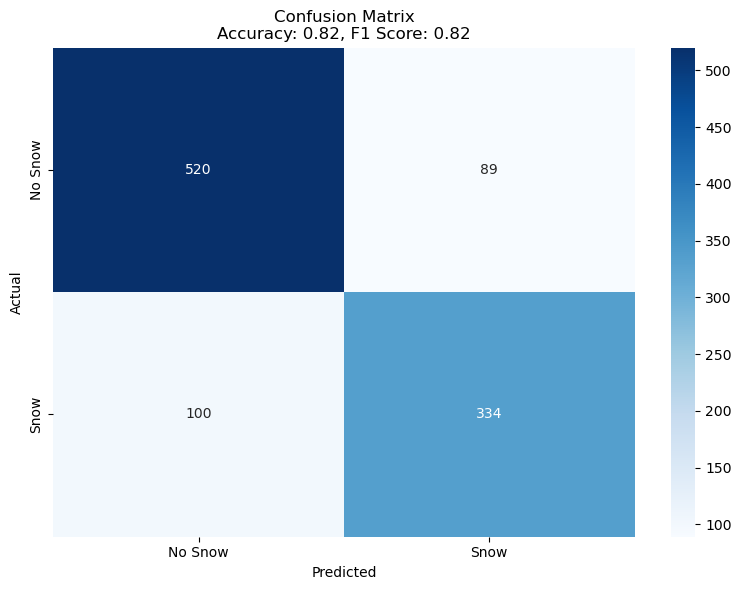

,camera,date,lat,lon,pvpg,pv,pg,data_quantity,snr,FSC,TreeSnow,layer_flag,file_index,msw_flag,pv_ratio_mean,pv_ratio_max,JointSnow,Conditions,classification
1323,torgnon,30/05/2019,45.819295,7.528580,0.484326,1.123240,2.319184,3.000000,0.179918,0.0,0.0,0.0,4.0,0.0000,NaN,NaN,0.0,No Snow,1
1321,torgnon,30/05/2019,45.801277,7.528580,0.142857,1.714286,11.999993,3.000000,0.225920,0.0,0.0,0.0,4.0,0.0000,NaN,NaN,0.0,No Snow,1
996,sodankyla_full,07/10/2021,67.384356,26.669262,0.025173,0.402749,15.999335,3.000000,140.711746,0.0,0.0,1.0,21.0,2.0000,NaN,NaN,0.0,No Snow,1
239,delta_junction,28/07/2023,63.849568,-145.700240,0.010000,0.309618,30.961806,3.000000,0.374551,0.0,0.0,0.0,27.0,0.0000,NaN,NaN,0.0,No Snow,1
241,delta_junction,28/07/2023,63.876595,-145.720704,0.084563,0.406270,4.804327,3.000000,0.374551,0.0,0.0,0.0,27.0,0.0000,NaN,NaN,0.0,No Snow,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,sodankyla_full,11/06/2020,67.330301,26.552235,0.404432,1.416190,3.501680,28.892857,9.363135,0.0,0.0,0.0,12.0,0.0000,1.488962,1.488962,0.0,No Snow,1
4,delta_junction,01/08/2021,63.876595,-145.741168,0.243051,1.138873,4.685735,31.000000,0.283702,0.0,0.0,0.0,18.0,0.0000,NaN,NaN,0.0,No Snow,1
235,delta_junction,28/04/2023,63.885605,-145.802560,1.654527,2.730392,1.650255,32.000000,0.108515,1.0,0.0,1.0,25.0,1.5625,NaN,NaN,1.0,Ground Snow,0
1220,sodankyla_full,24/01/2019,67.330301,26.645857,1.359172,1.484146,1.091949,34.000000,0.359874,1.0,1.0,1.0,1.0,3.0000,NaN,NaN,2.0,Ground and Canopy Snow,0


In [57]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

data.loc[:, 'classification'] = data.apply(
    # lambda row: 1 if row['pvpg'] <= 0.5 else (1 if row['pv'] > 3.8 * row['pvpg'] - 0.3 else 0),
    lambda row: 1 if row['pvpg'] <= 0.5 else (0 if row['pvpg'] > 1.5 else (1 if row['pv'] > 3 else (1 if row['pv'] > 8/3 * row['pvpg'] else 0))),
    axis=1
)

data.loc[:, 'FSC'] = data['FSC'].apply(lambda x: round(x))#.astype(int)

# Compute confusion matrix
labels = ['No Snow', 'Snow']
cm = confusion_matrix(data['FSC'], data['classification'])

# Calculate accuracy and F1 score
accuracy = accuracy_score(data['FSC'], data['classification'])
f1 = f1_score(data['FSC'], data['classification'], average='weighted')

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2f}, F1 Score: {f1:.2f}')
plt.tight_layout()
plt.show()
data[(((data['classification']==0)&(data['FSC']>.95))|((data['classification']==1)&(data['FSC']<.05)))].sort_values('data_quantity')

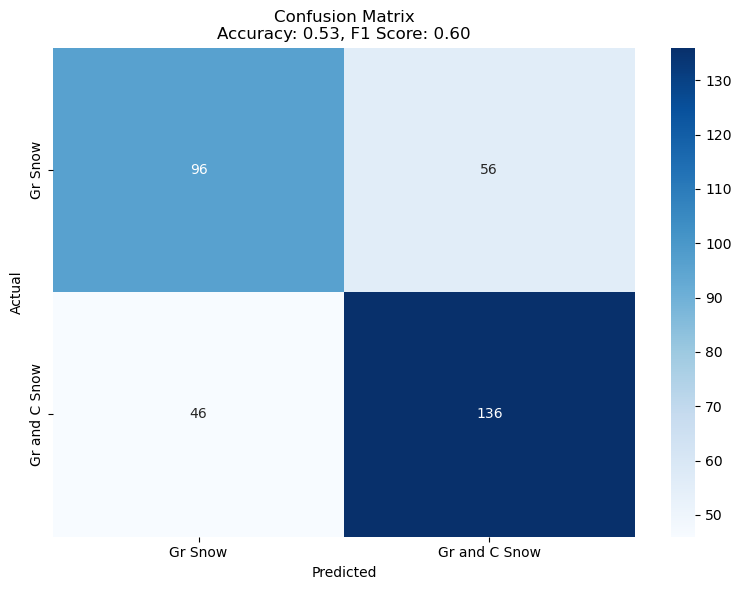

,camera,date,lat,lon,pvpg,pv,pg,data_quantity,snr,FSC,TreeSnow,layer_flag,file_index,msw_flag,pv_ratio_mean,pv_ratio_max,JointSnow,Conditions,classification
164,delta_junction,15/11/2018,63.885605,-145.700240,0.010000,0.141220,14.121951,3.000000,1.236282,1.0,1.0,1.0,1.0,3.0,NaN,NaN,2.0,Ground and Canopy Snow,1
1065,sodankyla_full,11/04/2020,67.357328,26.669262,1.250000,6.297619,5.038095,3.000000,360.712799,1.0,0.0,0.0,10.0,0.0,NaN,NaN,1.0,Ground Snow,2
949,sodankyla_full,03/01/2024,67.393365,26.669262,0.010000,0.438690,43.869048,3.000000,456.820526,1.0,1.0,1.0,33.0,1.0,NaN,NaN,2.0,Ground and Canopy Snow,1
313,lacclair,03/04/2024,46.974623,-71.715793,0.466178,1.942591,4.167056,3.000000,157.922607,1.0,0.0,1.0,22.0,0.0,1.778002,1.778002,1.0,Ground Snow,2
483,marcell_MN,18/03/2023,47.518414,-93.434096,0.010002,1.961726,196.129323,3.000000,0.463288,1.0,0.0,1.0,22.0,4.0,NaN,NaN,1.0,Ground Snow,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,lacclair,03/12/2019,46.983632,-71.649803,0.583964,2.596757,4.446774,28.571429,179.466010,1.0,0.3,0.0,4.0,0.0,2.315128,2.315128,2.0,Ground and Canopy Snow,1
412,lacclair,31/01/2021,46.974623,-71.676199,0.689618,2.945879,4.271756,29.508475,171.513570,1.0,0.6,0.0,10.0,0.0,2.173446,2.173446,2.0,Ground and Canopy Snow,1
138,delta_junction,11/11/2020,63.894614,-145.802560,0.154452,1.250921,8.099073,30.533333,26.277282,1.0,1.0,1.0,13.0,2.0,1.355394,1.355394,2.0,Ground and Canopy Snow,1
986,sodankyla_full,07/03/2023,67.375347,26.552235,0.527936,3.266476,6.187259,31.290323,7.217271,1.0,0.0,1.0,28.0,3.0,3.138014,3.138014,1.0,Ground Snow,2


In [58]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

# data.loc[:, 'classification'] = data.apply(
#     # lambda row: 1 if row['pvpg'] <= 0.5 else (2 if row['pv'] > 3.8 * row['pvpg'] - 0.3 else 0),
#     lambda row: 1 if row['pvpg'] <= 0.5 else (0 if row['pvpg'] > 1.5 else (2 if row['pv'] > 4 else (1 if row['pv'] > 8/3 * row['pvpg'] else 0))),
#     axis=1
# )
data.loc[:, 'classification'] = data.apply(
    # lambda row: 1 if row['pvpg'] <= 0.5 else (2 if row['pv'] > 3.8 * row['pvpg'] - 0.3 else 0),
    lambda row: 1 if (row['pvpg'] <= 0.5)&(row['pv'] <= 1.53) else (2 if row['pvpg'] <= 0.5 else (0 if row['pvpg'] > 1.5 else (2 if row['pv'] > 3 else (1 if row['pv'] > 8/3 * row['pvpg'] else 0)))),
    axis=1
)

data.loc[:, 'JointSnow'] = data['JointSnow'].apply(lambda x: np.ceil(x))#.astype(int)

# Compute confusion matrix
labels = ['Gr Snow', 'Gr and C Snow']
cm = confusion_matrix(data[~((data['JointSnow']==0)|(data['classification']==0))]['JointSnow'], data[~((data['JointSnow']==0)|(data['classification']==0))]['classification'])

# Calculate accuracy and F1 score
accuracy = accuracy_score(data[data['JointSnow']!=0]['JointSnow'], data[data['JointSnow']!=0]['classification'])
f1 = f1_score(data[data['JointSnow']!=0]['JointSnow'], data[data['JointSnow']!=0]['classification'], average='weighted')

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2f}, F1 Score: {f1:.2f}')
plt.tight_layout()
plt.show()
data[((data['classification']==1)&(data['JointSnow']==2))|
    ((data['classification']==2)&(data['JointSnow']==1))].sort_values('data_quantity')

/tmp/ipykernel_2389290/1348524901.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Conditions"] = data["JointSnow"].map({0: "No Snow", 1: "Ground Snow", 2: "Ground and Canopy Snow"})


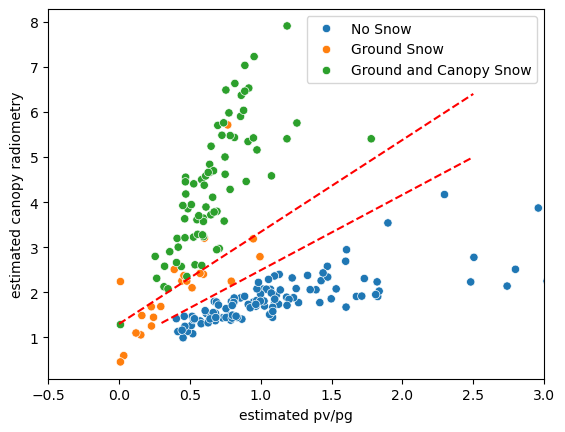

218


,camera,date,lat,lon,pvpg,pv,pg,data_quantity,snr,FSC,TreeSnow,layer_flag,file_index,msw_flag,pv_ratio_mean,pv_ratio_max,JointSnow,Conditions
1248,torgnon,14/02/2023,45.810286,7.541508,0.010000,2.239824,223.982353,25.761905,0.158256,1.0,0.0,0.0,22.0,0.000000,1.331304,1.331304,1.0,Ground Snow
1145,sodankyla_full,19/03/2023,67.384356,26.575640,0.010000,1.284602,128.460182,19.210526,1.063886,1.0,1.0,0.0,29.0,0.000000,3.952379,3.952379,2.0,Ground and Canopy Snow
493,marcell_MN,20/03/2022,47.473368,-93.434096,0.010000,0.456932,45.693013,18.837838,240.184526,1.0,0.0,0.0,16.0,0.000000,1.830670,1.830670,1.0,Ground Snow
1127,sodankyla_full,16/03/2024,67.393365,26.552235,0.033449,0.596839,17.843109,18.657143,4.332858,1.0,0.0,0.0,35.0,0.000000,1.594764,1.594764,1.0,Ground Snow
1129,sodankyla_full,16/03/2024,67.393365,26.692668,0.119818,1.098676,9.169559,20.450000,3.408555,1.0,0.0,0.0,35.0,0.000000,3.044062,3.044062,1.0,Ground Snow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,lacclair,29/05/2022,46.956605,-71.623407,4.950729,1.899123,0.383605,20.315789,114.941279,0.0,0.0,1.0,14.0,0.789474,1.213380,1.213380,0.0,No Snow
378,lacclair,13/07/2019,46.965614,-71.689397,5.394028,2.177343,0.403658,29.750000,0.313601,0.0,0.0,0.0,1.0,0.000000,1.326006,1.326006,0.0,No Snow
1254,torgnon,15/08/2023,45.828305,7.528580,5.988662,2.179168,0.363882,20.400000,27.451538,0.0,0.0,1.0,26.0,0.200000,1.457101,1.457101,0.0,No Snow
383,lacclair,13/07/2019,46.983632,-71.689397,14.581276,3.051767,0.209294,24.909091,0.334865,0.0,0.0,0.0,1.0,0.477273,1.215771,1.215771,0.0,No Snow


In [1]:
from scripts.imports import *

df = pd.read_pickle('dataset_landcover_forest_22_th3_1km_noprior.pkl')
# print(df.columns)

df_grouped = df.groupby(['camera','date','lat','lon']).agg({
    'pvpg': 'mean',
    'pv': 'max',
    'pg': 'max',
    'data_quantity': 'mean',
    'snr': 'mean',
    'FSC': 'mean',
    'TreeSnow': 'mean',
    'layer_flag': 'mean',
    'file_index': 'mean',
    'msw_flag': 'mean',
    'pv_ratio_mean': 'mean',
    'pv_ratio_max': 'mean'
}).reset_index()
df_grouped['JointSnow'] = df_grouped['FSC'] + df_grouped['TreeSnow']
data = df_grouped[((df_grouped['FSC'] <= 0.05)|(df_grouped['FSC'] >= 0.95))
    # &(df_grouped['pvpg']>.5)&(df_grouped['FSC'] > .8)
    # &(df_grouped['pvpg']<2)&(df_grouped['pvpg']>.8)&(df_grouped['FSC'] > .8)
    # &(df_grouped['pvpg']<2)&(df_grouped['pvpg']>.5)&(df_grouped['pv']>2)&(df_grouped['FSC'] > .8)
    # &(df_grouped['pvpg']<.5)&((df_grouped['FSC'] < .5)|(df_grouped['TreeSnow'] > 0))

    &(df_grouped['pv_ratio_mean'] >= 1.2)

    # &(df_grouped['data_quantity'] >= 18)]
    &((df_grouped['layer_flag'] <= .7)|(df_grouped['msw_flag'] < 1))&(df_grouped['data_quantity'] >= 18)]
    # &(df_grouped['layer_flag'] <= .8)&(df_grouped['data_quantity'] > 10)]

data.loc[:, 'JointSnow'] = data['JointSnow'].apply(lambda x: np.ceil(x))

data["Conditions"] = data["JointSnow"].map({0: "No Snow", 1: "Ground Snow", 2: "Ground and Canopy Snow"})

sns.scatterplot(data = data.sort_values('JointSnow'), x='pvpg', y='pv', hue='Conditions')#, size='data_quantity')
plt.xlabel('estimated pv/pg')
plt.ylabel('estimated canopy radiometry')
plt.xlim(-.5,3)
# plt.ylim(0,12)
plt.plot([0.3,2.5],[1.32,5],'r--')
plt.plot([0,2.5],[1.3,6.4],'r--')
# plt.plot([0.29,0.29],[0,1.32],'r--')
# plt.plot([0.5,0.5],[1.53,7],'r--')
plt.legend(loc='best')
plt.show()
print(len(data))
data.sort_values('pvpg')

/tmp/ipykernel_2389290/3043025698.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'classification'] = data.apply(


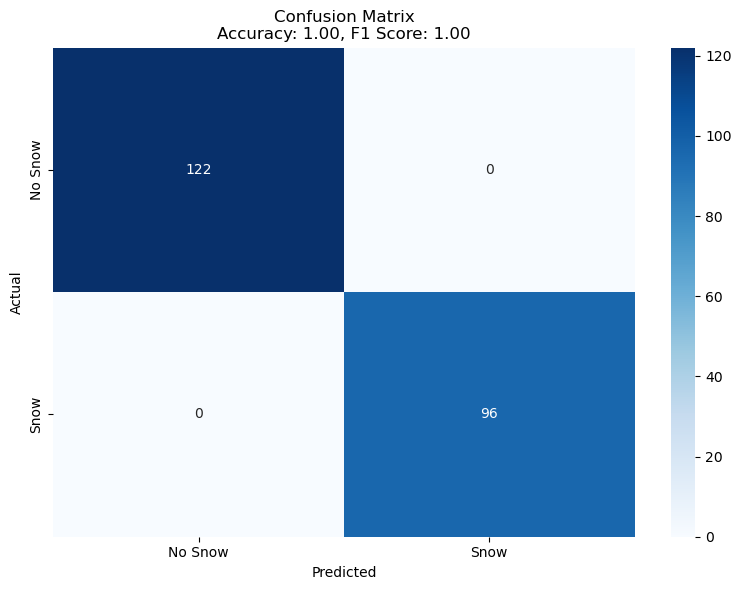

,camera,date,lat,lon,pvpg,pv,pg,data_quantity,snr,FSC,TreeSnow,layer_flag,file_index,msw_flag,pv_ratio_mean,pv_ratio_max,JointSnow,Conditions,classification


In [2]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

# data.loc[:, 'classification'] = data.apply(
#     # lambda row: 1 if row['pvpg'] <= 0.5 else (2 if row['pv'] > 3.8 * row['pvpg'] - 0.3 else 0),
#     lambda row: 1 if row['pvpg'] <= 0.5 else (0 if row['pvpg'] > 1.5 else (2 if row['pv'] > 4 else (1 if row['pv'] > 8/3 * row['pvpg'] else 0))),
#     axis=1
# )
data.loc[:, 'classification'] = data.apply(
    # lambda row: 1 if row['pvpg'] <= 0.5 else (2 if row['pv'] > 3.8 * row['pvpg'] - 0.3 else 0),
    lambda row: 0 if (row['pvpg'] >= 0.29)&(row['pv'] <= 3.68/2.2*(row['pvpg']-.3)+1.32) else (1 if row['pv'] >= 5.1/2.5*row['pvpg']+1.3 else 1),
    axis=1
)

data.loc[:, 'FSC'] = data['FSC'].apply(lambda x: np.ceil(x))#.astype(int)

# Compute confusion matrix
labels = ['No Snow', 'Snow']
cm = confusion_matrix(data['FSC'],data['classification'])

# Calculate accuracy and F1 score
accuracy = accuracy_score(data['FSC'], data['classification'])
f1 = f1_score(data['FSC'], data['classification'], average='weighted')

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2f}, F1 Score: {f1:.2f}')
plt.tight_layout()
plt.show()
data[(((data['classification']==0)&(data['FSC']>.95))|((data['classification']==1)&(data['FSC']<.05)))].sort_values('data_quantity')

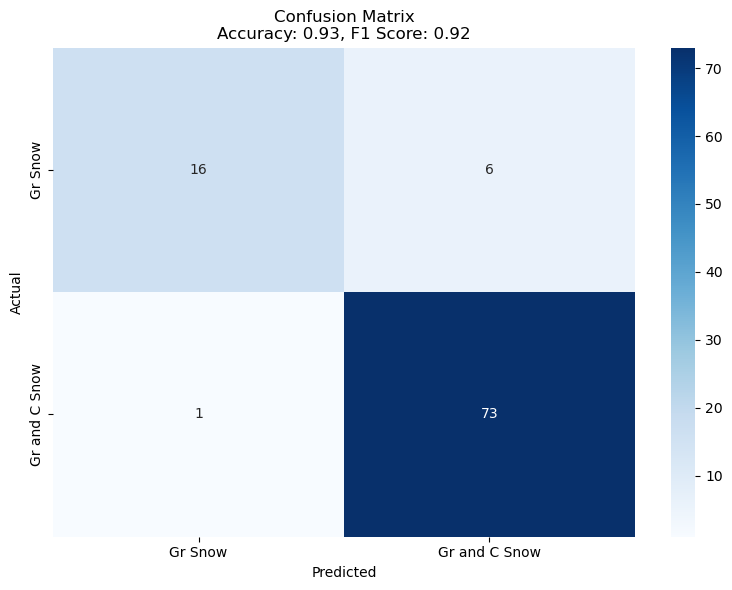

,camera,date,lat,lon,pvpg,pv,pg,data_quantity,snr,FSC,TreeSnow,layer_flag,file_index,msw_flag,pv_ratio_mean,pv_ratio_max,JointSnow,Conditions,classification
1145,sodankyla_full,19/03/2023,67.384356,26.575640,0.010000,1.284602,128.460182,19.210526,1.063886,1.0,1.0,0.000000,29.0,0.000000,3.952379,3.952379,2.0,Ground and Canopy Snow,1
1108,sodankyla_full,16/03/2024,67.330301,26.575640,0.389964,2.508284,6.432095,19.512821,3.868688,1.0,0.0,0.000000,35.0,0.000000,2.918038,2.918038,1.0,Ground Snow,2
494,marcell_MN,20/03/2022,47.482377,-93.434096,0.458141,2.371965,5.177373,20.450000,241.259816,1.0,0.0,0.000000,16.0,0.000000,2.907656,2.907656,1.0,Ground Snow,2
952,sodankyla_full,03/04/2024,67.330301,26.692668,0.602343,3.201936,5.315801,23.000000,116.193775,1.0,0.0,0.000000,36.0,0.000000,2.686547,2.686547,1.0,Ground Snow,2
1248,torgnon,14/02/2023,45.810286,7.541508,0.010000,2.239824,223.982353,25.761905,0.158256,1.0,0.0,0.000000,22.0,0.000000,1.331304,1.331304,1.0,Ground Snow,2
314,lacclair,03/04/2024,46.974623,-71.676199,0.443582,2.252947,5.078989,27.581818,181.601900,1.0,0.0,1.000000,22.0,0.000000,1.829352,1.829352,1.0,Ground Snow,2
61,delta_junction,05/01/2020,63.912632,-145.802560,0.767152,5.712628,7.446544,28.529412,116.616700,1.0,0.0,0.323529,6.0,0.647059,3.450034,3.450034,1.0,Ground Snow,2


In [3]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

# data.loc[:, 'classification'] = data.apply(
#     # lambda row: 1 if row['pvpg'] <= 0.5 else (2 if row['pv'] > 3.8 * row['pvpg'] - 0.3 else 0),
#     lambda row: 1 if row['pvpg'] <= 0.5 else (0 if row['pvpg'] > 1.5 else (2 if row['pv'] > 4 else (1 if row['pv'] > 8/3 * row['pvpg'] else 0))),
#     axis=1
# )
data.loc[:, 'classification'] = data.apply(
    # lambda row: 1 if row['pvpg'] <= 0.5 else (2 if row['pv'] > 3.8 * row['pvpg'] - 0.3 else 0),
    lambda row: 0 if (row['pvpg'] >= 0.5)&(row['pv'] <= 3.68/2.2*(row['pvpg']-.3)+1.32) else (2 if row['pv'] >= 5.1/2.5*row['pvpg']+1.3 else 1),
    axis=1
)

# print(data[data['classification']!=0]['JointSnow'])

# Compute confusion matrix
labels = ['Gr Snow', 'Gr and C Snow']
cm = confusion_matrix(data[~((data['JointSnow']==0)|(data['classification']==0))]['JointSnow'], data[~((data['JointSnow']==0)|(data['classification']==0))]['classification'])

# Calculate accuracy and F1 score
accuracy = accuracy_score(data[~((data['JointSnow']==0)|(data['classification']==0))]['JointSnow'], data[~((data['JointSnow']==0)|(data['classification']==0))]['classification'])
f1 = f1_score(data[~((data['JointSnow']==0)|(data['classification']==0))]['JointSnow'], data[~((data['JointSnow']==0)|(data['classification']==0))]['classification'], average='weighted')

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2f}, F1 Score: {f1:.2f}')
plt.tight_layout()
plt.show()
data[((data['classification']==1)&(data['JointSnow']==2))|
    ((data['classification']==2)&(data['JointSnow']==1))].sort_values('data_quantity')

### trim_atmospheric active

/tmp/ipykernel_2389290/2406233121.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Conditions"] = data["JointSnow"].map({0: "No Snow", 1: "Ground Snow", 2: "Ground and Canopy Snow"})


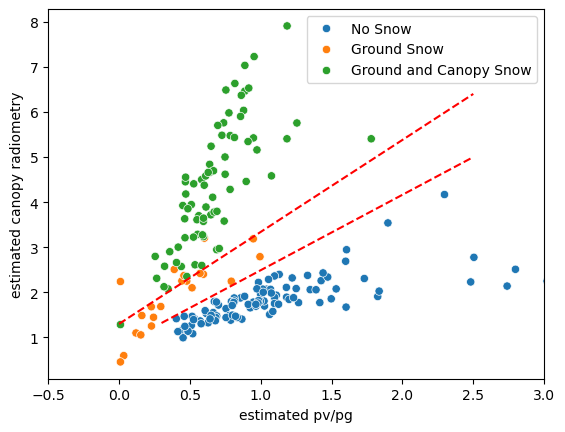

201


,camera,date,lat,lon,pvpg,pv,pg,data_quantity,snr,FSC,TreeSnow,layer_flag,file_index,msw_flag,pv_ratio_mean,pv_ratio_max,JointSnow,Conditions
767,torgnon,14/02/2023,45.810286,7.541508,0.010000,2.239824,223.982353,25.761905,0.158256,1.0,0.0,0.00,22.0,0.000000,1.331304,1.331304,1.0,Ground Snow
716,sodankyla_full,19/03/2023,67.384356,26.575640,0.010000,1.284602,128.460182,19.210526,1.063886,1.0,1.0,0.00,29.0,0.000000,3.952379,3.952379,2.0,Ground and Canopy Snow
283,marcell_MN,20/03/2022,47.473368,-93.434096,0.010000,0.456932,45.693013,18.837838,240.184526,1.0,0.0,0.00,16.0,0.000000,1.830670,1.830670,1.0,Ground Snow
704,sodankyla_full,16/03/2024,67.393365,26.552235,0.033449,0.596839,17.843109,18.657143,4.332858,1.0,0.0,0.00,35.0,0.000000,1.594764,1.594764,1.0,Ground Snow
706,sodankyla_full,16/03/2024,67.393365,26.692668,0.119818,1.098676,9.169559,20.450000,3.408555,1.0,0.0,0.00,35.0,0.000000,3.044062,3.044062,1.0,Ground Snow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,lacclair,13/07/2019,46.920568,-71.689397,4.554463,2.267037,0.497762,30.285714,0.313856,0.0,0.0,0.25,1.0,0.000000,1.339686,1.339686,0.0,No Snow
242,lacclair,13/07/2019,46.956605,-71.689397,4.676571,2.192539,0.468835,19.882353,0.326939,0.0,0.0,0.00,1.0,0.000000,1.467556,1.467556,0.0,No Snow
244,lacclair,13/07/2019,46.965614,-71.689397,5.394028,2.177343,0.403658,29.750000,0.313601,0.0,0.0,0.00,1.0,0.000000,1.326006,1.326006,0.0,No Snow
249,lacclair,13/07/2019,46.983632,-71.689397,14.581276,3.051767,0.209294,24.909091,0.334865,0.0,0.0,0.00,1.0,0.477273,1.215771,1.215771,0.0,No Snow


In [4]:
from scripts.imports import *

df = pd.read_pickle('dataset_landcover_forest_22_th3_1km_noprior_ta.pkl')
# print(df.columns)

df_grouped = df.groupby(['camera','date','lat','lon']).agg({
    'pvpg': 'mean',
    'pv': 'max',
    'pg': 'max',
    'data_quantity': 'mean',
    'snr': 'mean',
    'FSC': 'mean',
    'TreeSnow': 'mean',
    'layer_flag': 'mean',
    'file_index': 'mean',
    'msw_flag': 'mean',
    # 'pv_ratio': 'mean',
    'pv_ratio_mean': 'mean',
    'pv_ratio_max': 'mean'
}).reset_index()
df_grouped['JointSnow'] = df_grouped['FSC'] + df_grouped['TreeSnow']
data = df_grouped[((df_grouped['FSC'] <= 0.05)|(df_grouped['FSC'] >= 0.95))
    # &(df_grouped['pvpg']>.5)&(df_grouped['FSC'] > .8)
    # &(df_grouped['pvpg']<2)&(df_grouped['pvpg']>.8)&(df_grouped['FSC'] > .8)
    # &(df_grouped['pvpg']<2)&(df_grouped['pvpg']>.5)&(df_grouped['pv']>2)&(df_grouped['FSC'] > .8)
    # &(df_grouped['pvpg']<.5)&((df_grouped['FSC'] < .5)|(df_grouped['TreeSnow'] > 0))

    &(df_grouped['pv_ratio_mean'] >= 1.2)

    # &(df_grouped['data_quantity'] >= 18)]
    &((df_grouped['layer_flag'] <= .7)|(df_grouped['msw_flag'] < 1))&(df_grouped['data_quantity'] >= 18)]
    # &(df_grouped['layer_flag'] <= .8)&(df_grouped['data_quantity'] > 10)]

data.loc[:, 'JointSnow'] = data['JointSnow'].apply(lambda x: np.ceil(x))

data["Conditions"] = data["JointSnow"].map({0: "No Snow", 1: "Ground Snow", 2: "Ground and Canopy Snow"})

sns.scatterplot(data = data.sort_values('JointSnow'), x='pvpg', y='pv', hue='Conditions')#, size='data_quantity')
plt.xlabel('estimated pv/pg')
plt.ylabel('estimated canopy radiometry')
plt.xlim(-.5,3)
# plt.ylim(0,12)
plt.plot([0.3,2.5],[1.32,5],'r--')
plt.plot([0,2.5],[1.3,6.4],'r--')
# plt.plot([0.29,0.29],[0,1.32],'r--')
# plt.plot([0.5,0.5],[1.53,7],'r--')
plt.legend(loc='best')
plt.show()
print(len(data))
data.sort_values('pvpg')

/tmp/ipykernel_2389290/3043025698.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'classification'] = data.apply(


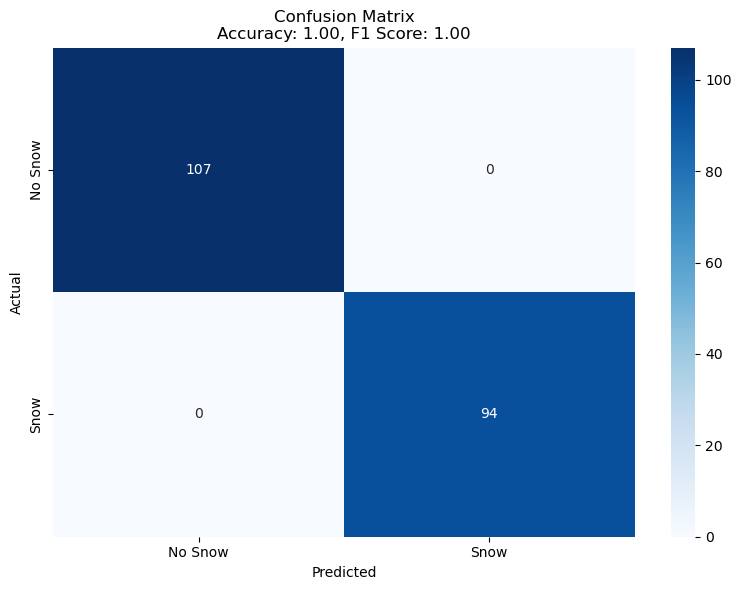

,camera,date,lat,lon,pvpg,pv,pg,data_quantity,snr,FSC,TreeSnow,layer_flag,file_index,msw_flag,pv_ratio_mean,pv_ratio_max,JointSnow,Conditions,classification


In [5]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

# data.loc[:, 'classification'] = data.apply(
#     # lambda row: 1 if row['pvpg'] <= 0.5 else (2 if row['pv'] > 3.8 * row['pvpg'] - 0.3 else 0),
#     lambda row: 1 if row['pvpg'] <= 0.5 else (0 if row['pvpg'] > 1.5 else (2 if row['pv'] > 4 else (1 if row['pv'] > 8/3 * row['pvpg'] else 0))),
#     axis=1
# )
data.loc[:, 'classification'] = data.apply(
    # lambda row: 1 if row['pvpg'] <= 0.5 else (2 if row['pv'] > 3.8 * row['pvpg'] - 0.3 else 0),
    lambda row: 0 if (row['pvpg'] >= 0.29)&(row['pv'] <= 3.68/2.2*(row['pvpg']-.3)+1.32) else (1 if row['pv'] >= 5.1/2.5*row['pvpg']+1.3 else 1),
    axis=1
)

data.loc[:, 'FSC'] = data['FSC'].apply(lambda x: np.ceil(x))#.astype(int)

# Compute confusion matrix
labels = ['No Snow', 'Snow']
cm = confusion_matrix(data['FSC'],data['classification'])

# Calculate accuracy and F1 score
accuracy = accuracy_score(data['FSC'], data['classification'])
f1 = f1_score(data['FSC'], data['classification'], average='weighted')

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2f}, F1 Score: {f1:.2f}')
plt.tight_layout()
plt.show()
data[(((data['classification']==0)&(data['FSC']>.95))|((data['classification']==1)&(data['FSC']<.05)))].sort_values('data_quantity')

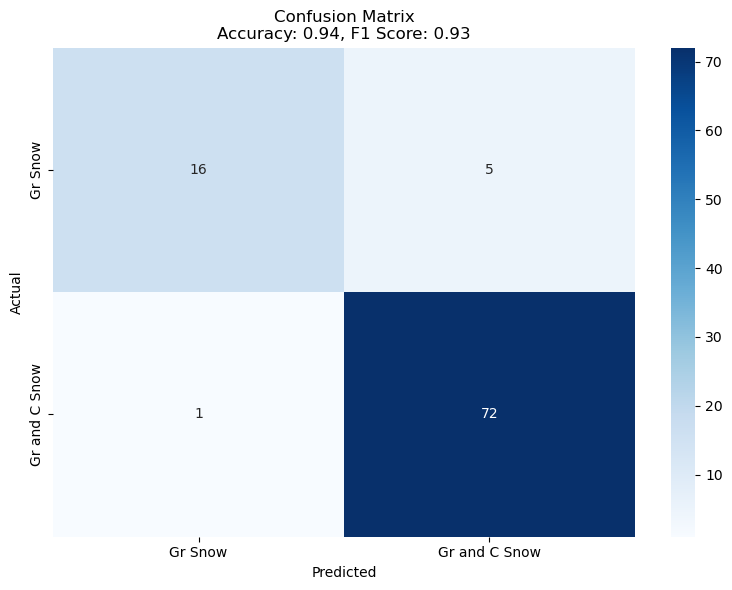

,camera,date,lat,lon,pvpg,pv,pg,data_quantity,snr,FSC,TreeSnow,layer_flag,file_index,msw_flag,pv_ratio_mean,pv_ratio_max,JointSnow,Conditions,classification
716,sodankyla_full,19/03/2023,67.384356,26.575640,0.010000,1.284602,128.460182,19.210526,1.063886,1.0,1.0,0.0,29.0,0.0,3.952379,3.952379,2.0,Ground and Canopy Snow,1
685,sodankyla_full,16/03/2024,67.330301,26.575640,0.389964,2.508284,6.432095,19.512821,3.868688,1.0,0.0,0.0,35.0,0.0,2.918038,2.918038,1.0,Ground Snow,2
284,marcell_MN,20/03/2022,47.482377,-93.434096,0.458141,2.371965,5.177373,20.450000,241.259816,1.0,0.0,0.0,16.0,0.0,2.907656,2.907656,1.0,Ground Snow,2
583,sodankyla_full,03/04/2024,67.330301,26.692668,0.602343,3.201936,5.315801,23.000000,116.193775,1.0,0.0,0.0,36.0,0.0,2.686547,2.686547,1.0,Ground Snow,2
767,torgnon,14/02/2023,45.810286,7.541508,0.010000,2.239824,223.982353,25.761905,0.158256,1.0,0.0,0.0,22.0,0.0,1.331304,1.331304,1.0,Ground Snow,2
191,lacclair,03/04/2024,46.974623,-71.676199,0.443582,2.252947,5.078989,27.581818,181.601900,1.0,0.0,1.0,22.0,0.0,1.829352,1.829352,1.0,Ground Snow,2


In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

# data.loc[:, 'classification'] = data.apply(
#     # lambda row: 1 if row['pvpg'] <= 0.5 else (2 if row['pv'] > 3.8 * row['pvpg'] - 0.3 else 0),
#     lambda row: 1 if row['pvpg'] <= 0.5 else (0 if row['pvpg'] > 1.5 else (2 if row['pv'] > 4 else (1 if row['pv'] > 8/3 * row['pvpg'] else 0))),
#     axis=1
# )
data.loc[:, 'classification'] = data.apply(
    # lambda row: 1 if row['pvpg'] <= 0.5 else (2 if row['pv'] > 3.8 * row['pvpg'] - 0.3 else 0),
    lambda row: 0 if (row['pvpg'] >= 0.5)&(row['pv'] <= 3.68/2.2*(row['pvpg']-.3)+1.32) else (2 if row['pv'] >= 5.1/2.5*row['pvpg']+1.3 else 1),
    axis=1
)

# print(data[data['classification']!=0]['JointSnow'])

# Compute confusion matrix
labels = ['Gr Snow', 'Gr and C Snow']
cm = confusion_matrix(data[~((data['JointSnow']==0)|(data['classification']==0))]['JointSnow'], data[~((data['JointSnow']==0)|(data['classification']==0))]['classification'])

# Calculate accuracy and F1 score
accuracy = accuracy_score(data[~((data['JointSnow']==0)|(data['classification']==0))]['JointSnow'], data[~((data['JointSnow']==0)|(data['classification']==0))]['classification'])
f1 = f1_score(data[~((data['JointSnow']==0)|(data['classification']==0))]['JointSnow'], data[~((data['JointSnow']==0)|(data['classification']==0))]['classification'], average='weighted')

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2f}, F1 Score: {f1:.2f}')
plt.tight_layout()
plt.show()
data[((data['classification']==1)&(data['JointSnow']==2))|
    ((data['classification']==2)&(data['JointSnow']==1))].sort_values('data_quantity')

### plot pg instead of pv

/tmp/ipykernel_2389290/223427942.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Conditions"] = data["JointSnow"].map({0: "No Snow", 1: "Ground Snow", 2: "Ground and Canopy Snow"})


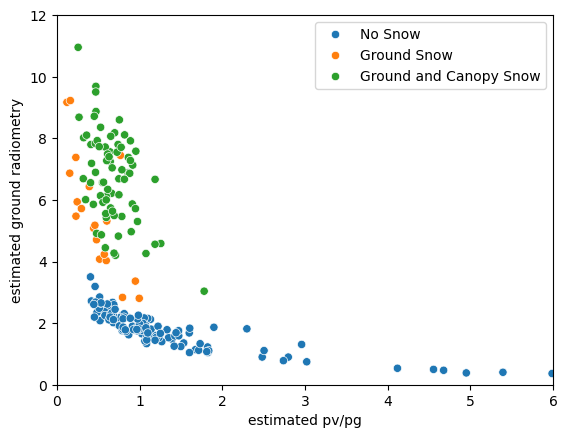

218


,camera,date,lat,lon,pvpg,pv,pg,data_quantity,snr,FSC,TreeSnow,layer_flag,file_index,msw_flag,pv_ratio_mean,pv_ratio_max,JointSnow,Conditions
1248,torgnon,14/02/2023,45.810286,7.541508,0.010000,2.239824,223.982353,25.761905,0.158256,1.0,0.0,0.0,22.0,0.000000,1.331304,1.331304,1.0,Ground Snow
1145,sodankyla_full,19/03/2023,67.384356,26.575640,0.010000,1.284602,128.460182,19.210526,1.063886,1.0,1.0,0.0,29.0,0.000000,3.952379,3.952379,2.0,Ground and Canopy Snow
493,marcell_MN,20/03/2022,47.473368,-93.434096,0.010000,0.456932,45.693013,18.837838,240.184526,1.0,0.0,0.0,16.0,0.000000,1.830670,1.830670,1.0,Ground Snow
1127,sodankyla_full,16/03/2024,67.393365,26.552235,0.033449,0.596839,17.843109,18.657143,4.332858,1.0,0.0,0.0,35.0,0.000000,1.594764,1.594764,1.0,Ground Snow
1129,sodankyla_full,16/03/2024,67.393365,26.692668,0.119818,1.098676,9.169559,20.450000,3.408555,1.0,0.0,0.0,35.0,0.000000,3.044062,3.044062,1.0,Ground Snow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,lacclair,29/05/2022,46.956605,-71.623407,4.950729,1.899123,0.383605,20.315789,114.941279,0.0,0.0,1.0,14.0,0.789474,1.213380,1.213380,0.0,No Snow
378,lacclair,13/07/2019,46.965614,-71.689397,5.394028,2.177343,0.403658,29.750000,0.313601,0.0,0.0,0.0,1.0,0.000000,1.326006,1.326006,0.0,No Snow
1254,torgnon,15/08/2023,45.828305,7.528580,5.988662,2.179168,0.363882,20.400000,27.451538,0.0,0.0,1.0,26.0,0.200000,1.457101,1.457101,0.0,No Snow
383,lacclair,13/07/2019,46.983632,-71.689397,14.581276,3.051767,0.209294,24.909091,0.334865,0.0,0.0,0.0,1.0,0.477273,1.215771,1.215771,0.0,No Snow


In [12]:
from scripts.imports import *

df = pd.read_pickle('dataset_landcover_forest_22_th3_1km_noprior.pkl')
# print(df.columns)

df_grouped = df.groupby(['camera','date','lat','lon']).agg({
    'pvpg': 'mean',
    'pv': 'max',
    'pg': 'max',
    'data_quantity': 'mean',
    'snr': 'mean',
    'FSC': 'mean',
    'TreeSnow': 'mean',
    'layer_flag': 'mean',
    'file_index': 'mean',
    'msw_flag': 'mean',
    'pv_ratio_mean': 'mean',
    'pv_ratio_max': 'mean'
}).reset_index()
df_grouped['JointSnow'] = df_grouped['FSC'] + df_grouped['TreeSnow']
data = df_grouped[((df_grouped['FSC'] <= 0.05)|(df_grouped['FSC'] >= 0.95))
    # &(df_grouped['pvpg']>.5)&(df_grouped['FSC'] > .8)
    # &(df_grouped['pvpg']<2)&(df_grouped['pvpg']>.8)&(df_grouped['FSC'] > .8)
    # &(df_grouped['pvpg']<2)&(df_grouped['pvpg']>.5)&(df_grouped['pv']>2)&(df_grouped['FSC'] > .8)
    # &(df_grouped['pvpg']<.5)&((df_grouped['FSC'] < .5)|(df_grouped['TreeSnow'] > 0))

    &(df_grouped['pv_ratio_mean'] >= 1.2)

    # &(df_grouped['data_quantity'] >= 18)]
    &((df_grouped['layer_flag'] <= .7)|(df_grouped['msw_flag'] < 1))&(df_grouped['data_quantity'] >= 18)]
    # &(df_grouped['layer_flag'] <= .8)&(df_grouped['data_quantity'] > 10)]

data.loc[:, 'JointSnow'] = data['JointSnow'].apply(lambda x: np.ceil(x))

data["Conditions"] = data["JointSnow"].map({0: "No Snow", 1: "Ground Snow", 2: "Ground and Canopy Snow"})

sns.scatterplot(data = data.sort_values('JointSnow'), x='pvpg', y='pg', hue='Conditions')#, size='data_quantity')
plt.xlabel('estimated pv/pg')
plt.ylabel('estimated ground radiometry')
plt.xlim(0,6)
plt.ylim(0,12)
# plt.plot([0.3,2.5],[1.32,5],'r--')
# plt.plot([0,2.5],[1.3,6.4],'r--')
plt.legend(loc='best')
plt.show()
print(len(data))
data.sort_values('pvpg')